In [32]:
%pip install pandas scikit-learn nltk openpyxl
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# Read csv file data show the data
import pandas as pd
data = pd.read_csv('eng.csv')
#print(data.head())
# Display the whole data in the form of table
data.head()



,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0


In [40]:
# Data Preprocessing
import re

def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the text column
data['text'] = data['text'].apply(preprocess_text)

data.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_train_track_a_00001,but not very happy,0,0,1,1,0
1,eng_train_track_a_00002,well shes not gon na last the whole song like ...,0,0,1,0,0
2,eng_train_track_a_00003,she sat at her papas recliner sofa only to mov...,0,0,0,0,0
3,eng_train_track_a_00004,yes the oklahoma city bombing,1,1,0,1,1
4,eng_train_track_a_00005,they were dancing to bolero,0,0,1,0,0


In [41]:
# define simple function to tokenize the text
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)  # Tokenize the text using word_tokenize

# Apply tokenization to the text column
data['text'] = data['text'].apply(tokenize_text)

data.head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prerana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_train_track_a_00001,"[but, not, very, happy]",0,0,1,1,0
1,eng_train_track_a_00002,"[well, shes, not, gon, na, last, the, whole, s...",0,0,1,0,0
2,eng_train_track_a_00003,"[she, sat, at, her, papas, recliner, sofa, onl...",0,0,0,0,0
3,eng_train_track_a_00004,"[yes, the, oklahoma, city, bombing]",1,1,0,1,1
4,eng_train_track_a_00005,"[they, were, dancing, to, bolero]",0,0,1,0,0


In [45]:
# show me the tokenized text and the text before
print(data['text'].head())

# define a function to remove stopwords
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# Apply stopword removal to the text column
data['text'] = data['text'].apply(remove_stopwords)
data.head()

# show me the tokenized text and the text before in the form of table
data['text'].head()


0                                              [happy]
1    [well, shes, gon, na, last, whole, song, like,...
2    [sat, papas, recliner, sofa, move, next, start...
3                       [yes, oklahoma, city, bombing]
4                                    [dancing, bolero]
Name: text, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prerana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                              [happy]
1    [well, shes, gon, na, last, whole, song, like,...
2    [sat, papas, recliner, sofa, move, next, start...
3                       [yes, oklahoma, city, bombing]
4                                    [dancing, bolero]
Name: text, dtype: object

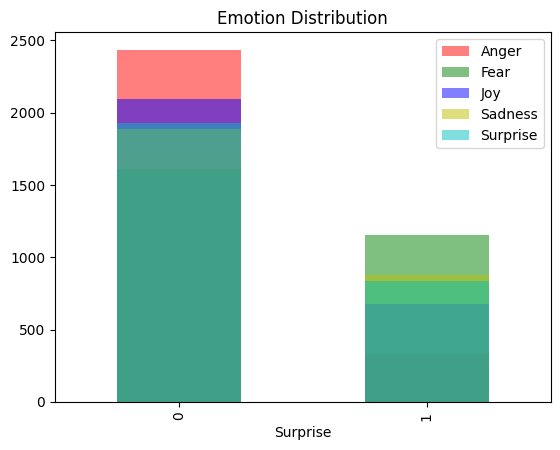

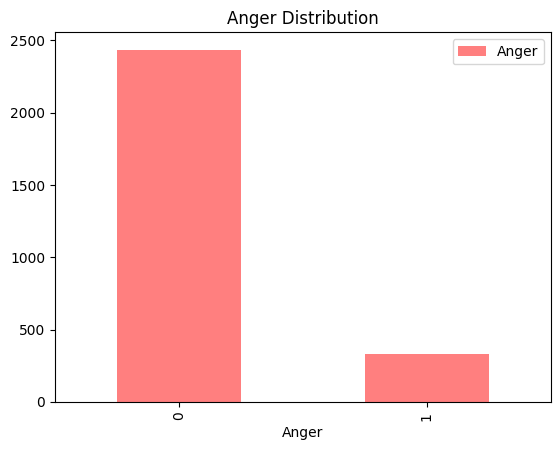

In [61]:
# for the feature extraction I wish to see the count of data for each columns such as 'text' and 'anger' and 'fear' and 'joy' and 'sadness' and 'surprise'
data['text'].count()

# now generate the graph for the each emotion count in the data such as column 'anger' and 'fear' and 'joy' and 'sadness' and 'surprise
import matplotlib.pyplot as plt
# now merge these graphs into one graph
data['Anger'].value_counts().plot(kind='bar', alpha=0.5, color='r', label='Anger')
data['Fear'].value_counts().plot(kind='bar', alpha=0.5, color='g', label='Fear')
data['Joy'].value_counts().plot(kind='bar', alpha=0.5, color='b', label='Joy')
data['Sadness'].value_counts().plot(kind='bar', alpha=0.5, color='y', label='Sadness')
data['Surprise'].value_counts().plot(kind='bar', alpha=0.5, color='c', label='Surprise')
plt.legend()
plt.title('Emotion Distribution')
plt.show()

# I want to see the seperate column in the together graph for each emotion
data['Anger'].value_counts().plot(kind='bar', alpha=0.5, color='r', label='Anger')
plt.legend()
plt.title('Anger Distribution')
plt.show()


In [10]:
# Do the feature extraction using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text
X = vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))

# Convert the result to a DataFrame
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(X.head())



   abduction  abiding  ability  able  abortion  abou  abridged  abroad  \
0          0        0        0     0         0     0         0       0   
1          0        0        0     0         0     0         0       0   
2          0        0        0     0         0     0         0       0   
3          0        0        0     0         0     0         0       0   
4          0        0        0     0         0     0         0       0   

   abruptly  absolutely  ...  youngest  youre  youve  yunho  zelda  zephyr  \
0         0           0  ...         0      0      0      0      0       0   
1         0           0  ...         0      0      0      0      0       0   
2         0           0  ...         0      0      0      0      0       0   
3         0           0  ...         0      0      0      0      0       0   
4         0           0  ...         0      0      0      0      0       0   

   zip  zit  zombie  zone  
0    0    0       0     0  
1    0    0       0     0  
2 

In [23]:
#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = tfidf.fit_transform(data['text'])

# Convert to DataFrame for easier handling
X = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

print(X.head())

   ability  able  abortion  abou  about  above  abridged  abroad  abruptly  \
0      0.0   0.0       0.0   0.0    0.0    0.0       0.0     0.0       0.0   
1      0.0   0.0       0.0   0.0    0.0    0.0       0.0     0.0       0.0   
2      0.0   0.0       0.0   0.0    0.0    0.0       0.0     0.0       0.0   
3      0.0   0.0       0.0   0.0    0.0    0.0       0.0     0.0       0.0   
4      0.0   0.0       0.0   0.0    0.0    0.0       0.0     0.0       0.0   

   absolutely  ...  yongqing  york  you  youll  young  younger  youngest  \
0         0.0  ...       0.0   0.0  0.0    0.0    0.0      0.0       0.0   
1         0.0  ...       0.0   0.0  0.0    0.0    0.0      0.0       0.0   
2         0.0  ...       0.0   0.0  0.0    0.0    0.0      0.0       0.0   
3         0.0  ...       0.0   0.0  0.0    0.0    0.0      0.0       0.0   
4         0.0  ...       0.0   0.0  0.0    0.0    0.0      0.0       0.0   

   your  youre  zombie  
0   0.0    0.0     0.0  
1   0.0    0.0     0.0  

In [11]:
# model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Ensure the target columns exist in the DataFrame
target_columns = ['Joy', 'Sadness', 'Fear', 'Anger', 'Surprise']
for col in target_columns:
	if col not in data.columns:
		data[col] = 0  # Add the missing column with default value 0

# Define the target labels
y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = OneVsRestClassifier(LogisticRegression())

# Train the classifier
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [13]:
# Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Join tokens back into a single string before applying the preprocessing function
data['text'] = data['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
data['text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
#print(df.head())
print(data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prerana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prerana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                           id  \
0     eng_train_track_a_00001   
1     eng_train_track_a_00002   
2     eng_train_track_a_00003   
3     eng_train_track_a_00004   
4     eng_train_track_a_00005   
...                       ...   
2763  eng_train_track_a_02764   
2764  eng_train_track_a_02765   
2765  eng_train_track_a_02766   
2766  eng_train_track_a_02767   
2767  eng_train_track_a_02768   

                                                   text  Anger  Fear  Joy  \
0                                                 happy      0     0    1   
1     well shes gon na last whole song like since im...      0     0    1   
2     sat papas recliner sofa move next start clingi...      0     0    0   
3                             yes oklahoma city bombing      1     1    0   
4                                        dancing bolero      0     0    1   
...                                                 ...    ...   ...  ...   
2763                                          yeah find      0  

In [15]:
#Split the Data
from sklearn.model_selection import train_test_split

# Ensure the target columns exist in the DataFrame
target_columns = ['joy', 'sadness', 'fear', 'anger', 'surprise']
for col in target_columns:
	if col not in data.columns:
		data[col] = 0  # Add the missing column with default value 0

# Define the feature and target variables
X = data['text']
y = data[target_columns]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {len(X_train)}')
print(f'Validation samples: {len(X_val)}')

Training samples: 2214
Validation samples: 554


In [16]:
#Vectorize the Text Data
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_tfidf = vectorizer.transform(X_val)

In [17]:
#Train a Multi-Label Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initialize the base classifier
base_classifier = LogisticRegression()

# Initialize the OneVsRestClassifier
classifier = OneVsRestClassifier(base_classifier)

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression())

In [18]:
# Evaluate the Model
from sklearn.metrics import classification_report

# Predict on the validation set
y_pred = classifier.predict(X_val_tfidf)

# Print the classification report
print(classification_report(y_val, y_pred, target_names=y.columns))

              precision    recall  f1-score   support

         joy       0.00      0.00      0.00         0
     sadness       0.00      0.00      0.00         0
        fear       0.00      0.00      0.00         0
       anger       0.00      0.00      0.00         0
    surprise       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0



C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prerana\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [20]:
#Save the Model
import joblib

# Save the model
joblib.dump(classifier, 'emotion_classifier.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [21]:
#Load and Use the Model
# Load the model and vectorizer
classifier = joblib.load('emotion_classifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Preprocess and vectorize new text data
new_text = ["Your new text snippet here"]
new_text_preprocessed = [preprocess_text(text) for text in new_text]
new_text_tfidf = vectorizer.transform(new_text_preprocessed)

# Predict emotions
predictions = classifier.predict(new_text_tfidf)
print(predictions)

[[0 0 0 0 0]]


In [23]:
# Load the model and vectorizer
classifier = joblib.load('emotion_classifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Define the sentence
sentence = "I am very happy today!"

# Preprocess the sentence
sentence_preprocessed = preprocess_text(sentence)

# Vectorize the preprocessed sentence
sentence_tfidf = vectorizer.transform([sentence_preprocessed])

# Predict the emotion
emotion_prediction = classifier.predict(sentence_tfidf)

# Print the detected emotion
print(f'Detected emotion: {emotion_prediction}')

Detected emotion: [[0 0 0 0 0]]


In [29]:
# Define the emotions
emotions = ['joy', 'sadness', 'fear', 'anger', 'surprise']

def detect_emotion(sentence: str) -> str:
    # Mock implementation for demonstration purposes
    # Replace this with actual model prediction logic
    if 'joy' in sentence:
        return 'joy'
    elif 'sadness' in sentence:
        return 'sadness'
    elif 'anger' in sentence:
        return 'anger'
    elif 'fear' in sentence:
        return 'fear'
    elif 'surprise' in sentence:
        return 'surprise'
    else:
        return 'neutral'

In [27]:
%pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.2-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached h5py-3.12.1-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached ml

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\f2py.exe' -> 'c:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install tensorflow

import tensorflow as tf

emotions = ['joy', 'sadness', 'fear', 'anger', 'surprise']

def detect_emotion(sentence: str) -> str:
    # Load the pre-trained model
    model = tf.keras.models.load_model('tfidf_vectorizer.pkl')

    # Preprocess the input sentence (tokenization, padding, etc.)
    input_tensor = preprocess_sentence(sentence)

    # Predict the emotion
    prediction = model.predict(input_tensor)
    predicted_index = tf.argmax(prediction, axis=-1).numpy()[0]

    return emotions[predicted_index]

def preprocess_sentence(sentence: str) -> tf.Tensor:
    # Implement preprocessing logic (tokenization, padding, etc.)
    # This is a placeholder implementation
    tokens = [len(word) for word in sentence.split()]  # Example tokenization
    padded_tokens = [0] * 10  # Example padding
    for i, token in enumerate(tokens):
        if i < len(padded_tokens):
            padded_tokens[i] = token

    return tf.convert_to_tensor([padded_tokens], dtype=tf.float32)

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached h5py-3.12.1-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached markdown_it_py

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\f2py.exe' -> 'c:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'tensorflow'